# Analog Passive Filters

## Objective

This experiment aims:

1-To investigate passive filters and determine their characteristics.

## Introduction

In electronics, filters are circuits that allow certain frequencies to pass and block others. 
Filters can be classified according to the element they are made of: 
Active filters, which are made of active component like transistors and Op. amplifiers, 
and Passive filters: which are made of passive component like resistors, capacitors and inductors. 
Filters also can be classified by their frequency response as low-pass, high-pass, band-pass, band-reject and all-pass. 
Filters are used in many applications:
High-pass filters are used to block DC in certain circuits like audio speakers and RF devices. They can also be used in conjunction with a low-pass filter to make a band-pass filter. 
Low-pass filters are used as integrators and in radio transmitters to block unwanted harmonics which cause interference. 
Band-pass filters are widely used in tuning circuit to select certain channel. Band-reject filters are used to block certain bands like the noise generated from power lines in 50 Hz and non-linearity of power amplifiers. All-pass filters are generally used to compensate for other undesired phase shifts that arise in the system.

## Data Plot

It is usually preferred to plot a data on a graph than a table, 2-Dimensions graphs illustrate clearly more information and hence Data could be investigated easily.
The input data will be on a horizontal “x” scale and the output will be on a vertical “y” scale. When the range of both variables is not large, both scales would be linear. However, If one of the variables has a wide range then its scale will be logarithmic, semi-log plot. When both variables cover large range then both scales will be logarithmic, log-log plot. 

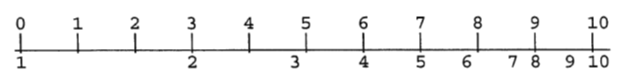


## Procedure

### First Order Filters

The experimental work proposed consists in determine magnitude and phase characteristics of filters.

First of all, consider the circuits shown below.

Determine the transfer function, $\frac{Vin(\omega)}{Vout(\omega)}$ and plot its frequency response.

The attenuation, defined as ratio of Vout/Vin shall be plotted on semi-log graph as a function of the frequency.

### Low Pass Filter

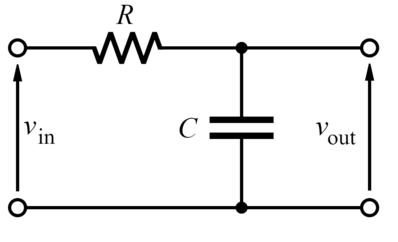

$\frac{Vin(\omega)}{Vout(\omega)} = \frac{X_c}{R+X_c}$


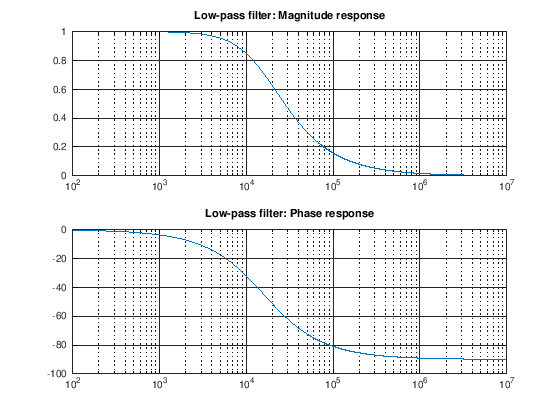

In [20]:
clear all;
warning ("off")
f   = 0:1e2:1e7;  % frequency vector

c   = 1e-7;       % capacitor Farad
l   = 1e-3;       % inductor Henry
r   = 100;        % resistor Ohm
xc  = 1./(1i*2*pi*f*c);
xl  = 1i*2*pi*f*l;

lp  = xc./(r+xc);       % low-pass filter transfer function
MgL = abs(lp);          % Magnitude response
PhL = angle(lp)*180/pi; % Phase response in degree


figure();
subplot(211);semilogx(f,MgL);grid on; title('Low-pass filter: Magnitude response')
subplot(212);semilogx(f,PhL);grid on; title('Low-pass filter: Phase response')

---

### High Pass Filter

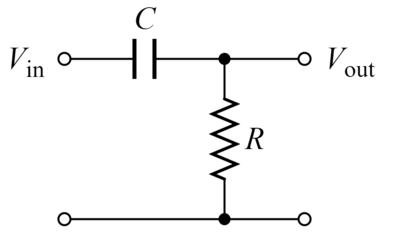



$\frac{Vin(\omega)}{Vout(\omega)} = \frac{R}{R+X_c}$


lp =  0.50049 - 0.50000i


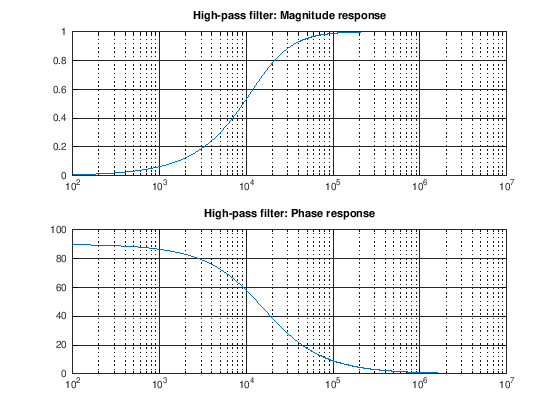

In [21]:
hp  = r./(r+xc);        % high-pass filter transfer function
MgH = abs(hp);          % Magnitude response
PhH = angle(hp)*180/pi; % Phase response in degree

figure();
subplot(211);semilogx(f,MgH);grid on; title('High-pass filter: Magnitude response')
subplot(212);semilogx(f,PhH);grid on; title('High-pass filter: Phase response')

In [34]:
length(MgH)
result = find(MgH >0.70 & MgH < 0.71)
f(159)

ans =  100001
result =

   158   159   160   161

ans =  15800


---

### Band Pass Filter
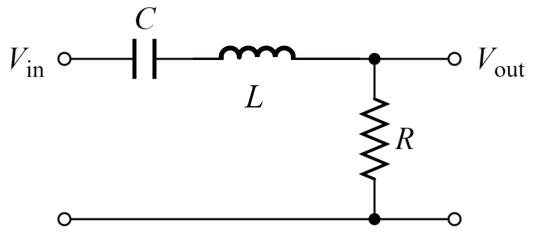


$\frac{Vin(\omega)}{Vout(\omega)} = \frac{R}{R+X_c+X_l}$

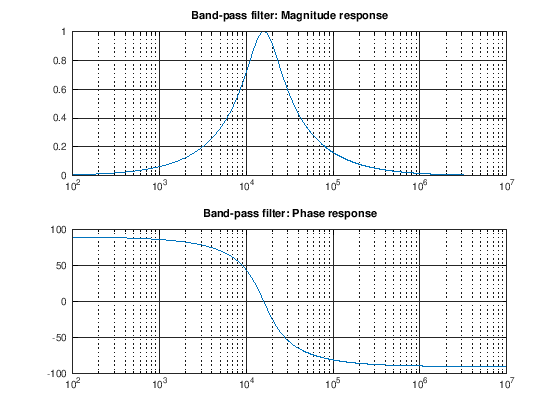

In [36]:
bp  = r./(r+xc+xl);     % band-pass filter transfer function
MgB = abs(bp);          % Magnitude response
PhB = angle(bp)*180/pi; % Phase response in degree

figure();
subplot(211);semilogx(f,MgB);grid on; title('Band-pass filter: Magnitude response')
subplot(212);semilogx(f,PhB);grid on; title('Band-pass filter: Phase response')

In [38]:
result = find(MgB >0.704 & MgB < 0.71);
f(result)

ans =

    9800   25700   25800



## Phase  Measurement by Lissajous Patterns
The oscilloscope may be used to compare simultaneously two separate waveforms. When two signals of the same frequency are impressed on the oscilloscope, one on the vertical and one on the horizontal plates, an elliptic pattern results on the screen. The width of this pattern is dependent on the phase difference between the input signals, if they are in phase or 180° out of phase: a straight line will be displayed. An ellipse is obtained for other phase angles. The phase difference can be calculated by taking the ratio of the vertical intercept to the maximum vertical deflection. The phase shift is now calculated $\phi = \sin^{-1} (a / b)$

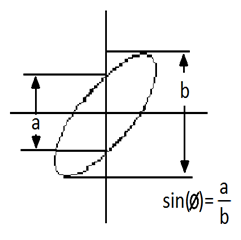

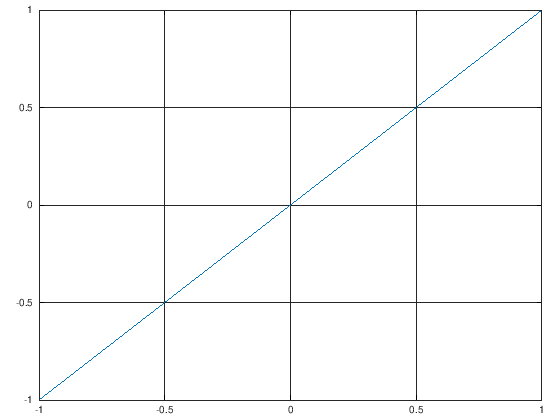

In [26]:
fs   =  1e2;
t    =  0 : 1/fs : 1;
vin  =  sin(2*pi*t);
vout =  sin(2*pi*t);

plot(vin,vout);grid on;

----

### Filter Design in Matlab

Filters can be designed using different ways. In the textbook, Butterworth filters were introduced.

$|H(f)| = \frac{1}{\sqrt{1+(\frac{f}{B})^{2n}}}$

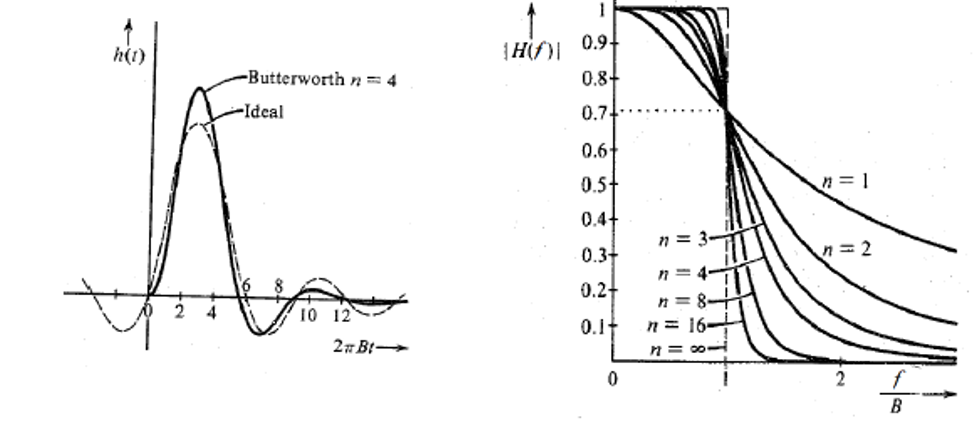

Here, we will design analog filters using ``` matlab command: butter ```

In ```Octave, butter ``` is a built-in function from ``` signal package```


In [40]:
pkg load signal % loading signal package
help butter

'butter' is a function from the file /usr/share/octave/packages/signal-1.3.2/butter.m

 -- Function File: [B, A] = butter (N, W)
 -- Function File: [B, A] = butter (N, W, "high")
 -- Function File: [B, A] = butter (N, [WL, WH])
 -- Function File: [B, A] = butter (N, [WL, WH], "stop")
 -- Function File: [Z, P, G] = butter (...)
 -- Function File: [A, B, C, D] = butter (...)
 -- Function File: [...] = butter (..., "s")
     Generate a Butterworth filter.  Default is a discrete space (Z)
     filter.

     [b,a] = butter(n, Wc) low pass filter with cutoff pi*Wc radians

     [b,a] = butter(n, Wc, 'high') high pass filter with cutoff pi*Wc
     radians

     [b,a] = butter(n, [Wl, Wh]) band pass filter with edges pi*Wl and
     pi*Wh radians

     [b,a] = butter(n, [Wl, Wh], 'stop') band reject filter with edges
     pi*Wl and pi*Wh radians

     [z,p,g] = butter(...)  return filter as zero-pole-gain rather than
     coefficients of the numerator and denominator polynomials.

     [...]  =

```
 Low pass filter with cutoff 'pi*Wc' radians:

          [b, a] = butter (n, Wc)

     High pass filter with cutoff 'pi*Wc' radians:

          [b, a] = butter (n, Wc, "high")

     Band pass filter with edges 'pi*Wl' and 'pi*Wh' radians:

          [b, a] = butter (n, [Wl, Wh])

     Band reject filter with edges 'pi*Wl' and 'pi*Wh' radians:

          [b, a] = butter (n, [Wl, Wh], "stop")
```

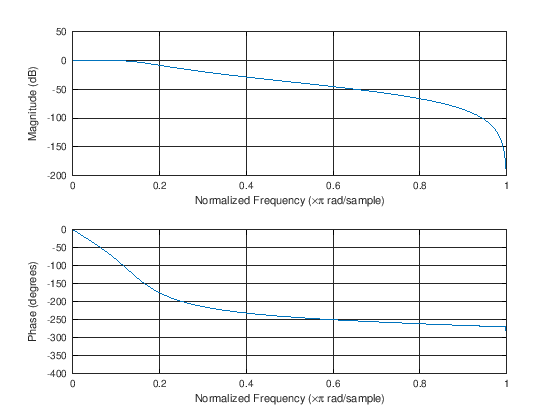

In [41]:
fc     = 300;                  % cutoff frequency
fs     = 1000;                 % sampling frequency
n      = 3;                    % filter order

[b, a] = butter (n, fc/fs/2);  % Low pass filter with cutoff fc radians
freqz(b,a)                     % Plots the magnitude and phase response of b/a filter

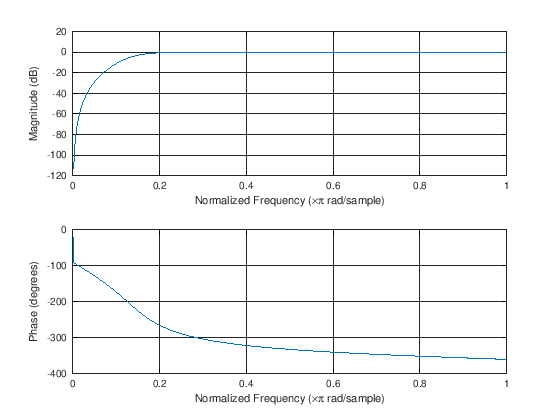

In [ ]:
fc     = 300;                        % cutoff frequency
fs     = 1000;                       % sampling frequency
n      = 3;                          % filter order

[b, a] = butter (n, fc/fs/2, "high"); % High pass filter with cutoff fs
freqz(b,a)                            % Plots the magnitude and phase response of b/a filter

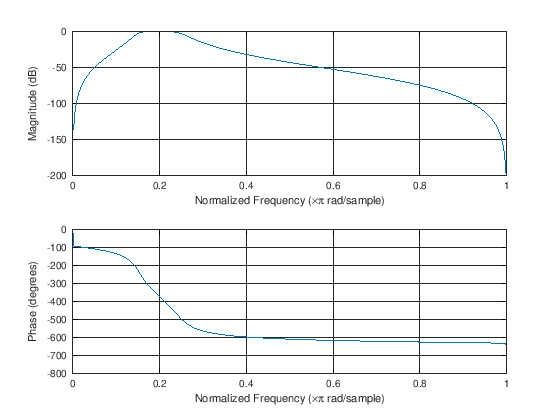

In [42]:
fc1    = 300;                           % first cutoff frequency
fc2    = 500;                           % first cutoff frequency
fs     = 1000;                          % sampling frequency
n      = 3;                             % filter order

[b, a] = butter (n, [fc/fs/2, fc2/fs/2]); % Band pass filter with edges fc1 and fc2 radians
freqz(b,a)                                % Plots the magnitude and phase response of b/a filter

---

### Filtering a Signal from High Frequency Noise

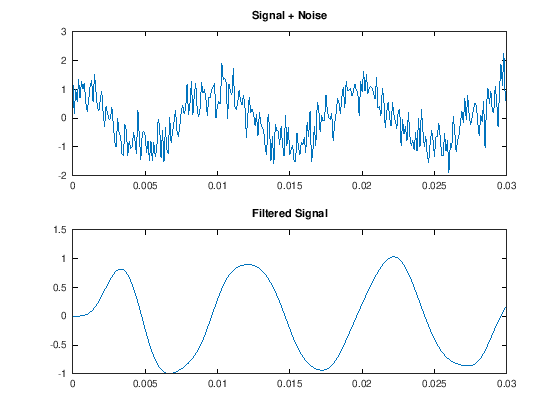

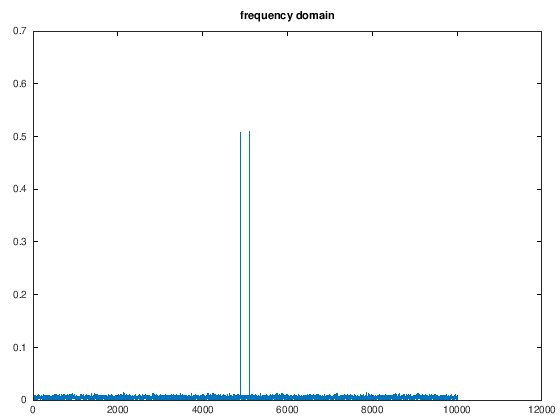

In [46]:
warning("off")
pkg load signal

fs    = 1e4;
t     = 0:1/fs:1;
f     = 100;
x     = cos( 2*pi*f*t )+ 0.5*randn( size(t) );
[b a] = butter(5,10*f/fs/2);
X     = filter(b,a,x);

figure();
subplot(211);plot(t(1:300),x(1:300));title('Signal + Noise')
subplot(212);plot(t(1:300),X(1:300));title('Filtered Signal')

function X = sig_spec(x)
% sig_spec, is just a name, you can use your own, determines the spectrum of x by calculating FFT
% X is the signal in frequency domain
% x is the signal
X = abs( fftshift( fft(x)/length(x) ));

end

figure, plot(sig_spec(x));title('frequency domain')


---

### Filtering a Square Wave to a Sinusoidal Signal

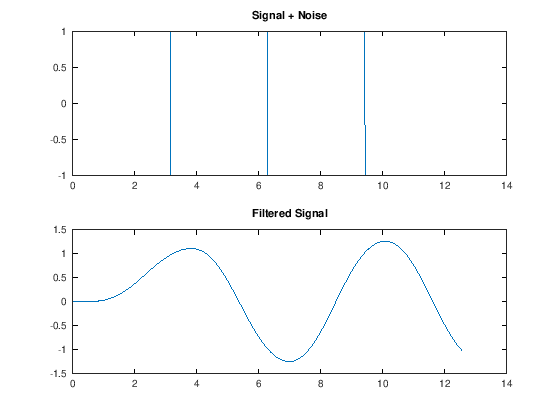

In [45]:
fs    = 1e2;
t     = 0:1/fs:4*pi;
x     = square(t);
[b a] = butter(5,1/fs/2);
X     = filter(b,a,x);

figure();
subplot(211);plot(t,x);title('Signal + Noise')
subplot(212);plot(t,X);title('Filtered Signal')

---

## Discussion
- What is cutoff frequency of a filter? Determine cutoff frequency for above filters?
- What is the resonance frequency in Bandpass circuit? Determine the phase shift at resonance frequency?
- What is the normalized frequency? ( x$\pi$ rad/sample )
